![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/04_Hyperparameter%20Tuning%20with%20Cross%20Validation/04_cross-validation_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Load the Data

- We take some dataset from the _[Machine Learning Data Repository UCI](https://archive.ics.uci.edu/ml/datasets/adult)_
- The aim is to predict weather a **person** (rows) `earned>50k` a year or not
- Based on their **social-demographic features** (columns)

PD: You may see the column names & meanings [here ↗](https://archive.ics.uci.edu/ml/datasets/adult).

In [4]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df_salary = pd.read_csv(url, header=None, na_values=' ?')
df_salary.rename(columns={14: 'target'}, inplace=True)
df_salary.columns = [str(i) for i in df_salary.columns]
df_salary.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Preprocess the Data

In [5]:
df_salary.isna().sum()

0            0
1         1836
2            0
3            0
4            0
5            0
6         1843
7            0
8            0
9            0
10           0
11           0
12           0
13         583
target       0
dtype: int64

In [6]:
df_salary.dropna()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df_salary = pd.get_dummies(data=df_salary, drop_first=True)
df_salary

,0,2,4,10,11,12,1_ Local-gov,1_ Never-worked,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay,3_ 11th,3_ 12th,3_ 1st-4th,3_ 5th-6th,3_ 7th-8th,3_ 9th,3_ Assoc-acdm,3_ Assoc-voc,3_ Bachelors,3_ Doctorate,3_ HS-grad,3_ Masters,3_ Preschool,3_ Prof-school,3_ Some-college,5_ Married-AF-spouse,5_ Married-civ-spouse,5_ Married-spouse-absent,5_ Never-married,5_ Separated,5_ Widowed,6_ Armed-Forces,6_ Craft-repair,6_ Exec-managerial,6_ Farming-fishing,6_ Handlers-cleaners,6_ Machine-op-inspct,6_ Other-service,6_ Priv-house-serv,6_ Prof-specialty,6_ Protective-serv,6_ Sales,6_ Tech-support,6_ Transport-moving,7_ Not-in-family,7_ Other-relative,7_ Own-child,7_ Unmarried,7_ Wife,8_ Asian-Pac-Islander,8_ Black,8_ Other,8_ White,9_ Male,13_ Canada,13_ China,13_ Columbia,13_ Cuba,13_ Dominican-Republic,13_ Ecuador,13_ El-Salvador,13_ England,13_ France,13_ Germany,13_ Greece,13_ Guatemala,13_ Haiti,13_ Holand-Netherlands,13_ Honduras,13_ Hong,13_ Hungary,13_ India,13_ Iran,13_ Ireland,13_ Italy,13_ Jamaica,13_ Japan,13_ Laos,13_ Mexico,13_ Nicaragua,13_ Outlying-US(Guam-USVI-etc),13_ Peru,13_ Philippines,13_ Poland,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia,target_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Feature Selection

In [8]:
target = df_salary.iloc[:,-1]

In [9]:
features = df_salary.iloc[:,:-1]

## `train_test_split()` the Data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
>>> X_train, X_test, y_train, y_test = train_test_split(
...     features, target, test_size=0.33, random_state=42)

## `DecisionTreeClassifier()` with Default Hyperparameters

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
model_dt = DecisionTreeClassifier ()

In [15]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Accuracy

#### > In `train` data

In [16]:
model_dt.score(X=X_train, y=y_train)

1.0

#### > In `test` data

In [17]:
model_dt.score(X=X_test, y=y_test)

0.8150009305788201

### Model Visualization

In [18]:
from sklearn.tree import plot_tree

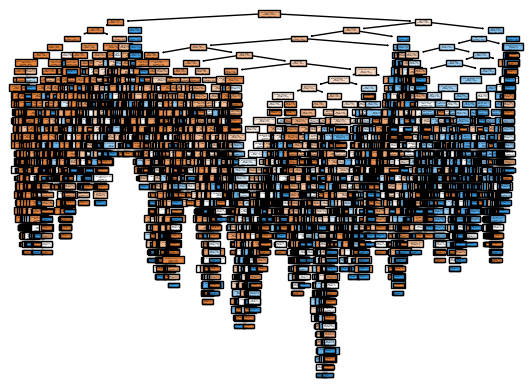

In [19]:
plot_tree(decision_tree=model_dt, feature_names=features.columns, filled=True);

## Interpretation

- [ ] Why the difference on accuracy is so much?

## `DecisionTreeClassifier()` with Custom Hyperparameters

In [37]:
model_dt = DecisionTreeClassifier(max_depth=2)

In [38]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

### 1st Configuration

#### Accuracy

##### > In `train` data

In [39]:
model_dt.score(X_train, y_train)

0.8279624111849645

##### > In `test` data

In [40]:
model_dt.score(X_test, y_test)

0.8287734971152056

#### Model Visualization

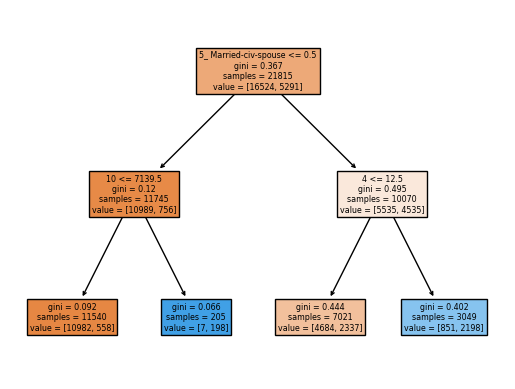

In [41]:
plot_tree(decision_tree=model_dt, feature_names=features.columns, filled=True);

### 2nd Configuration

In [53]:
model_dt = DecisionTreeClassifier(min_samples_split=100)

In [54]:
model_dt.fit(X=X_train, y=y_train)

DecisionTreeClassifier(min_samples_split=100)

#### Accuracy

##### In `train` data

In [55]:
model_dt.score(X=X_train, y=y_train)

0.881732752693101

##### In `test` data

In [56]:
dt.score(X=X_test, y=y_test)

0.8572492090080029

#### Model Visualization

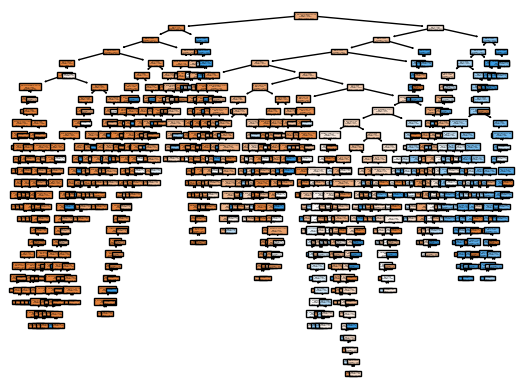

In [57]:
plot_tree(decision_tree=model_dt, feature_names=features.columns, filled=True);

### 3rd Configuration

In [63]:
model_dt = DecisionTreeClassifier(max_depth=7)

In [64]:
model_dt.fit(X=X_train, y=y_train)

DecisionTreeClassifier(max_depth=7)

#### Accuracy

##### In `train` data

In [65]:
dt.score(X=X_train, y=y_train)

0.8599129039651616

##### In `test` data

In [66]:
dt.score(X=X_test, y=y_test)

0.8572492090080029

#### Model Visualization

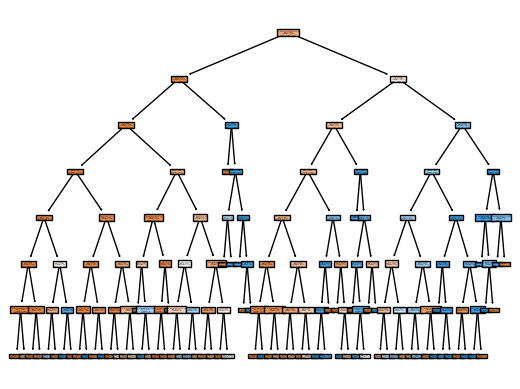

In [67]:
plot_tree(decision_tree=model_dt, feature_names=features.columns, filled=True);

### 4th Configuration

In [68]:
model_dt = DecisionTreeClassifier(max_depth=9, criterion='entropy')

In [69]:
model_dt.fit(X=X_train, y=y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

#### Accuracy

##### In `train` data

In [70]:
model_dt.score(X=X_train, y=y_train)

0.8633509053403622

##### In `test` data

In [71]:
model_dt.score(X=X_test, y=y_test)

0.853713009491904

#### Model Visualization

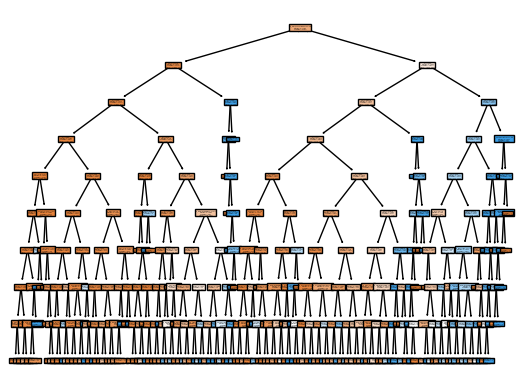

In [72]:
plot_tree(decision_tree=model_dt, feature_names=features.columns, filled=True);

### 5th Configuration

In [73]:
model_dt = DecisionTreeClassifier(min_weight_fraction_leaf=0.3, min_samples_leaf=150)

In [74]:
model_dt.fit(X=X_train, y=y_train)

DecisionTreeClassifier(min_samples_leaf=150, min_weight_fraction_leaf=0.3)

#### Accuracy

##### In `train` data

In [75]:
model_dt.score(X=X_train, y=y_train)

0.7574604629841852

##### In `test` data

In [76]:
model_dt.score(X=X_test, y=y_test)

0.7627024008933556

#### Model Visualization

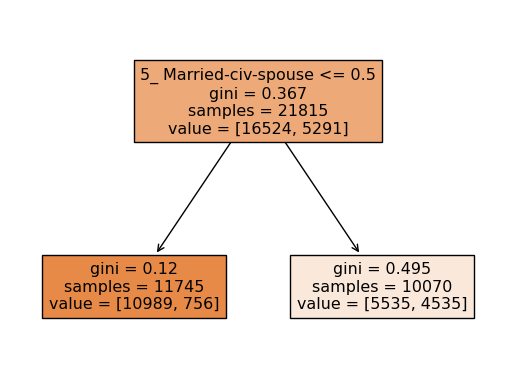

In [77]:
plot_tree(decision_tree=model_dt, feature_names=features.columns, filled=True);

## `GridSearchCV()` to find Best Hyperparameters

## Other Models

### Support Vector Machines `SVC()`

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [71]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/efR1C6CvhmE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [141]:
from sklearn.preprocessing import MinMaxScaler

In [142]:
scaler = MinMaxScaler()

In [143]:
scaler.fit(X=X_train)

MinMaxScaler()

In [144]:
scaler.transform(X_train)

array([[0.46575342, 0.0754839 , 0.86666667, ..., 1.        , 0.        ,
        0.        ],
       [0.39726027, 0.0925035 , 0.53333333, ..., 0.        , 0.        ,
        0.        ],
       [0.10958904, 0.17328344, 0.8       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.01369863, 0.13854675, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.45205479, 0.02850817, 0.53333333, ..., 1.        , 0.        ,
        0.        ],
       [0.23287671, 0.07835129, 0.8       , ..., 1.        , 0.        ,
        0.        ]])

In [145]:
scaler.transform(X_test)

array([[0.1369863 , 0.10044213, 0.6       , ..., 1.        , 0.        ,
        0.        ],
       [0.38356164, 0.02599938, 0.53333333, ..., 1.        , 0.        ,
        0.        ],
       [0.16438356, 0.11791676, 0.8       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.65753425, 0.00851591, 0.53333333, ..., 1.        , 0.        ,
        0.        ],
       [0.34246575, 0.1109663 , 0.53333333, ..., 1.        , 0.        ,
        0.        ],
       [0.15068493, 0.09337281, 0.53333333, ..., 0.        , 0.        ,
        0.        ]])

In [146]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

In [147]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
from sklearn.svm import SVC

In [150]:
model_sv = SVC()

In [151]:
model_sv.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [152]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

In [153]:
model_sv = GridSearchCV(estimator=model_sv, param_grid=param_grid, verbose=2)

In [154]:
model_sv.fit(X=X_train_scaled, y=y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............................C=0.1, kernel=linear; total time=  23.7s
[CV] END ...............................C=0.1, kernel=linear; total time=  23.9s
[CV] END ...............................C=0.1, kernel=linear; total time=  29.5s
[CV] END ...............................C=0.1, kernel=linear; total time=  29.6s
[CV] END ...............................C=0.1, kernel=linear; total time=  24.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=  36.8s
[CV] END ..................................C=0.1, kernel=rbf; total time=  37.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=  36.7s
[CV] END ..................................C=0.1, kernel=rbf; total time=  37.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=  37.2s
[CV] END .................................C=1, kernel=linear; total time=  26.2s
[CV] END .................................C=1, ke

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             verbose=2)

In [155]:
model_sv.best_params_

{'C': 10, 'kernel': 'linear'}

### K Nearest Neighbors `KNeighborsClassifier()`

In [159]:
from sklearn.neighbors import KNeighborsClassifier

In [160]:
kn = KNeighborsClassifier()

In [161]:
kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [162]:
param_grid = {
    'leaf_size': [10, 20, 30, 50],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'n_neighbors': [3, 5, 10, 20]
}

In [163]:
kn = GridSearchCV(estimator=kn, param_grid=param_grid, verbose=2)

In [164]:
kn.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   1.1s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   0.8s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   0.9s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   0.8s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   0.8s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   0.8s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   0.8s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   0.8s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   0.8s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   0.8s
[CV] END .....leaf_size=10, metric=minkowski, n_neighbors=10; total time=   0.8s
[CV] END .....leaf_size=10, metric=minkowski, n

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30, 50],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 10, 20]},
             verbose=2)

In [165]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/HVXime0nQeI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [166]:
kn.best_params_

{'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 20}

# Best Model with Best Hyperparameters

In [169]:
dic_results = {
    'model': [
        model_sv.best_estimator_,
        kn.best_estimator_
    ],
    'hyperparameters': [
        model_sv.best_params_,
        kn.best_params_
    ],
    'score': [
        model_sv.score(X_test_scaled, y_test),
        kn.score(X_test_scaled, y_test)
    ]
}

In [170]:
df_cv_comp = pd.DataFrame(dic_results)
df_cv_comp.style.background_gradient()

,model,hyperparameters,score
0,"SVC(C=10, kernel='linear')","{'C': 10, 'kernel': 'linear'}",0.851759
1,"KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=20)","{'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 20}",0.832403


# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [X] Even a model can be bettered
- [X] The goal is to make models that perform a better accuracy on data not seen
    - The banks would like to know if a **future client** will be able to pay the loan
    - Not a past client
    - Unfortunately, we do not have data for future clients
    - So, we fix this with `Data Splitting` into
        - Train
            - Fold Validation
        - Test
- [X] Understand the Machine Learning Applications to businesses
    - To predict if a customer will pay the loan
    - To predict if an athlete will have an injury